In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [118]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [119]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X = training_data.iloc[:,1:]
Y = training_data.label 


(-0.5, 27.5, 27.5, -0.5)

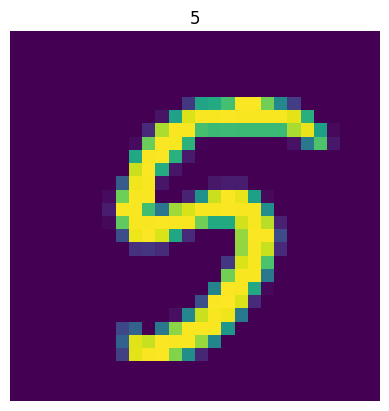

In [121]:
img = X.iloc[8].values
img = img.reshape((28,28))
plt.imshow(img)
plt.title(Y.iloc[8])
plt.axis(False)

In [122]:
X= X.values.reshape(-1,28,28,1)
X_train , X_test , Y_train,Y_test = train_test_split(X, Y ,test_size=0.1)

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten 
from tensorflow.keras.optimizers import RMSprop,Adam

In [124]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [141]:
epochs= 15
batch_size = 256
model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/15
148/148 [==============================] - 13s 88ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 2/15
148/148 [==============================] - 12s 83ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 3/15
148/148 [==============================] - 12s 80ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 4/15
148/148 [==============================] - 12s 78ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 5/15
148/148 [==============================] - 11s 73ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 6/15
148/148 [==============================] - 11s 76ms/step - loss: 8.9889e-04 - accuracy: 0.9998
Epoch 7/15
148/148 [==============================] - 12s 78ms/step - loss: 3.8255e-04 - accuracy: 1.0000
Epoch 8/15
148/148 [==============================] - 12s 79ms/step - loss: 1.5759e-04 - accuracy: 1.0000
Epoch 9/15
148/148 [==============================] - 12s 83ms/step - loss: 1.2135e-04 - accuracy: 1.0000
Epoch 10/15
148/148 [==============================] - 11s 77ms/st

In [142]:
predictions = model.predict(X_test)

132/132 [==============================] - 1s 5ms/step


In [143]:
predicted_digit = tf.argmax(predictions, axis=1).numpy()

In [144]:
predicted_digit

array([5, 2, 2, ..., 2, 2, 4], dtype=int64)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted_digit,Y_test)

0.9854761904761905